In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [14]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(mean=[0, 3], cov=[[1, 0.5], [0.5, 1]], size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(mean=[3, 0], cov=[[1, 0.5], [0.5, 1]], size=num_samples_per_class)

In [15]:
inputs = np.vstack((negative_samples, positive_samples)).astype("float32")
targets = np.vstack((np.zeros(num_samples_per_class), np.ones(num_samples_per_class))).astype("float32")
targets = targets.reshape(2000,)

<Axes: >

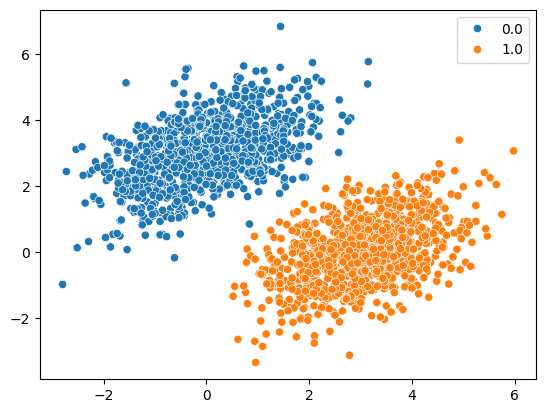

In [20]:
plt.figure()
sns.scatterplot(x=inputs[:,0], y=inputs[:,1], hue=targets)

In [3]:
import tensorflow as tf
from tensorflow import keras

class SimpleDense(keras.layers.Layer):

    def __init__(self, units, activation=None):
        super().__init__()
        self.units = units
        self.activation = activation

    def build(self, input_shape):
        input_dim = input_shape[-1]
        self.W = self.add_weight(shape=(input_dim, self.units),
                                 initializer="random_normal")
        self.b = self.add_weight(shape=(self.units,),
                                 initializer="zeros")

    def call(self, inputs):
        y = tf.matmul(inputs, self.W) + self.b
        if self.activation is not None:
            y = self.activation(y)
        return y

In [4]:
my_dense = SimpleDense(units=32, activation=tf.nn.relu)
input_tensor = tf.ones(shape=(2, 784))
output_tensor = my_dense(input_tensor)
print(output_tensor.shape)

(2, 32)


In [5]:
from tensorflow.keras import layers
layer = layers.Dense(32, activation="relu")

In [6]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32)
])

In [7]:
model = keras.Sequential([
    SimpleDense(32, activation="relu"),
    SimpleDense(64, activation="relu"),
    SimpleDense(32, activation="relu"),
    SimpleDense(10, activation="softmax")
])

In [8]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer="rmsprop",
              loss="mean_squared_error",
              metrics=["accuracy"])

In [9]:
model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

In [16]:
history = model.fit(
    inputs,
    targets,
    epochs=5,
    batch_size=128
)

Epoch 1/5
16/16 [==============================] - 1s 3ms/step - loss: 9.9419 - binary_accuracy: 0.9970
Epoch 2/5
16/16 [==============================] - 0s 2ms/step - loss: 9.5593 - binary_accuracy: 0.9970
Epoch 3/5
16/16 [==============================] - 0s 2ms/step - loss: 9.2312 - binary_accuracy: 0.9975
Epoch 4/5
16/16 [==============================] - 0s 2ms/step - loss: 8.9169 - binary_accuracy: 0.9975
Epoch 5/5
16/16 [==============================] - 0s 2ms/step - loss: 8.6111 - binary_accuracy: 0.9975


In [17]:
history.history

{'loss': [9.941892623901367,
  9.559310913085938,
  9.231218338012695,
  8.916851997375488,
  8.61108112335205],
 'binary_accuracy': [0.996999979019165,
  0.996999979019165,
  0.9975000023841858,
  0.9975000023841858,
  0.9975000023841858]}

In [18]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.1),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

indices_permutation = np.random.permutation(len(inputs))
shuffled_inputs = inputs[indices_permutation]
shuffled_targets = targets[indices_permutation]

num_validation_samples = int(0.3 * len(inputs))
val_inputs = shuffled_inputs[:num_validation_samples]
val_targets = shuffled_targets[:num_validation_samples]
training_inputs = shuffled_inputs[num_validation_samples:]
training_targets = shuffled_targets[num_validation_samples:]
model.fit(
    training_inputs,
    training_targets,
    epochs=5,
    batch_size=16,
    validation_data=(val_inputs, val_targets)
)

Epoch 1/5
88/88 [==============================] - 2s 13ms/step - loss: 0.1937 - binary_accuracy: 0.9164 - val_loss: 0.0409 - val_binary_accuracy: 0.9967
Epoch 2/5
88/88 [==============================] - 1s 8ms/step - loss: 0.0658 - binary_accuracy: 0.9607 - val_loss: 0.0658 - val_binary_accuracy: 0.9817
Epoch 3/5
88/88 [==============================] - 0s 5ms/step - loss: 0.0722 - binary_accuracy: 0.9586 - val_loss: 0.0300 - val_binary_accuracy: 1.0000
Epoch 4/5
88/88 [==============================] - 1s 6ms/step - loss: 0.0745 - binary_accuracy: 0.9557 - val_loss: 0.0616 - val_binary_accuracy: 0.9633
Epoch 5/5
88/88 [==============================] - 1s 9ms/step - loss: 0.0636 - binary_accuracy: 0.9686 - val_loss: 0.0612 - val_binary_accuracy: 0.9667


In [23]:
predictions = model.predict(val_inputs, batch_size=128)
print(predictions[:10,0])

5/5 [==============================] - 0s 5ms/step
[1.1472001  0.38302875 0.9499971  1.032591   0.21513301 0.24428263
 0.4089467  0.17242569 1.1377798  1.0621328 ]


<Axes: >

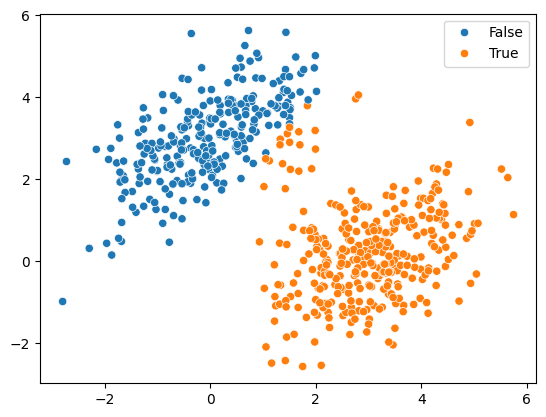

In [30]:
plt.figure()
sns.scatterplot(x=val_inputs[:,0], y=val_inputs[:,1], hue=predictions[:,0] > 0.5)